#### NOTEBOOK 1: Исследование и предобработка данных

#### Шаг 1.
##### Настройка окружения и импорт всех библиотек/моделей и остального, что будет использоваться;переброс и shut down предупреждений и не мешающих работе ошибок

In [ ]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

##### starting with shutting down/redirecting all of the error notes about sizes of files and Future Version Warning

In [ ]:
#отключаем ненужные предупреждения и ошибки librosa
os.environ['LIBROSA_SHOW_STDERR'] = '0'

#перенаправление stderr (ошибок по типу libmpg123) в null
sys.stderr = open(os.devnull, 'w')

warnings.filterwarnings('ignore', category=FutureWarning)

#Устанавливаем цветовую палитру
#sns.set_palette("husl")
#plt.style.use('seaborn-v0_8-darkgrid')

#### Шаг 2.

##### Загрузка данных

Всего файлов: 2511
Уникальных говорящих: 50

Первые строки:
                                           file_path   speaker_id
0  C:\Users\ancol\.cache\kagglehub\datasets\vjcal...  Speaker0026
1  C:\Users\ancol\.cache\kagglehub\datasets\vjcal...  Speaker0026
2  C:\Users\ancol\.cache\kagglehub\datasets\vjcal...  Speaker0026
3  C:\Users\ancol\.cache\kagglehub\datasets\vjcal...  Speaker0026
4  C:\Users\ancol\.cache\kagglehub\datasets\vjcal...  Speaker0026

Статистика по записям:
count     50.000000
mean      50.220000
std       22.926048
min       10.000000
25%       34.000000
50%       43.000000
75%       57.250000
max      120.000000
Name: count, dtype: float64


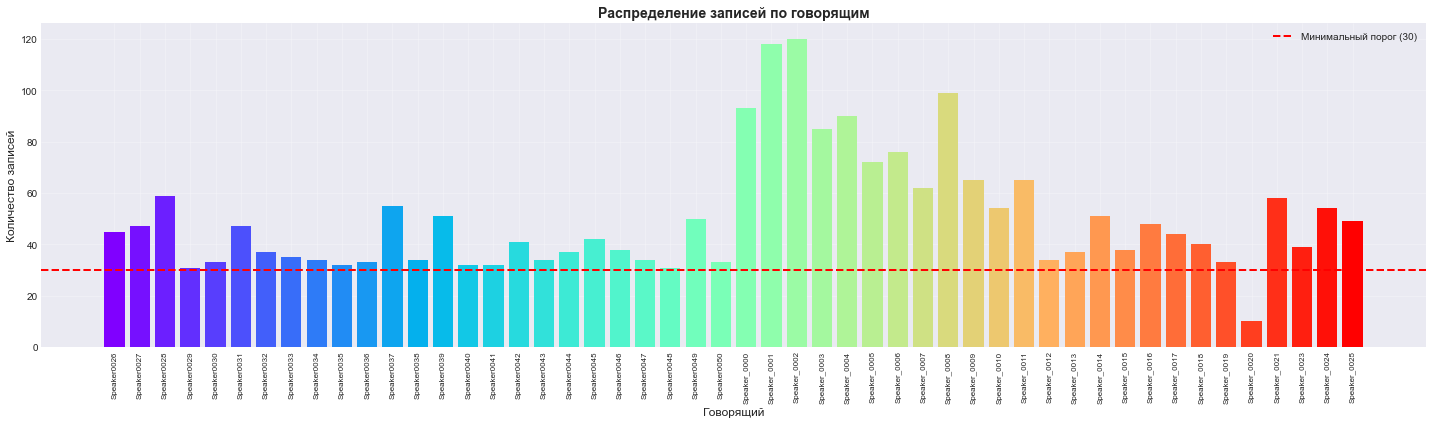

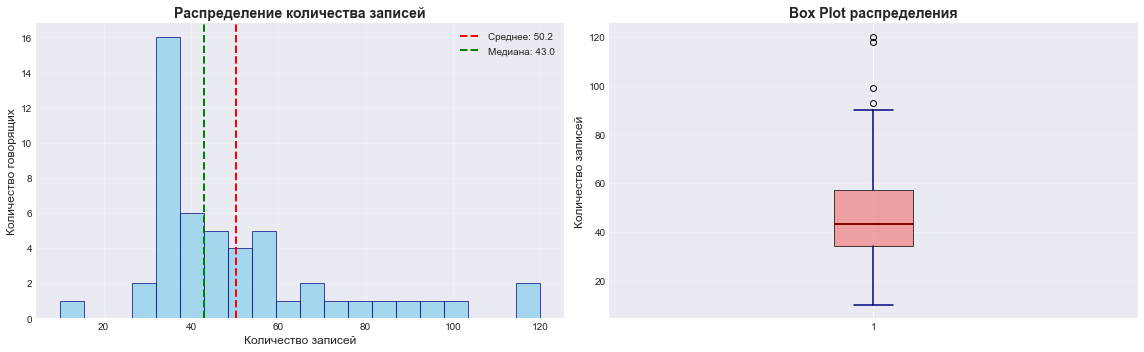


Анализ качества аудио...

Статистика по качеству аудио:
        duration        rms        zcr  spectral_centroid  silence_percent
count  50.000000  50.000000  50.000000          50.000000        50.000000
mean   60.000669   0.053270   0.135391        1727.298403        26.591187
std     0.000890   0.015278   0.056377         399.479590        12.108713
min    60.000375   0.032090   0.012412         860.269259         0.000000
25%    60.000375   0.041096   0.108032        1555.985100        21.466689
50%    60.000375   0.050756   0.137611        1789.303046        27.946804
75%    60.000375   0.068270   0.179545        1998.430449        35.587390
max    60.003312   0.078786   0.218710        2422.297672        47.893034


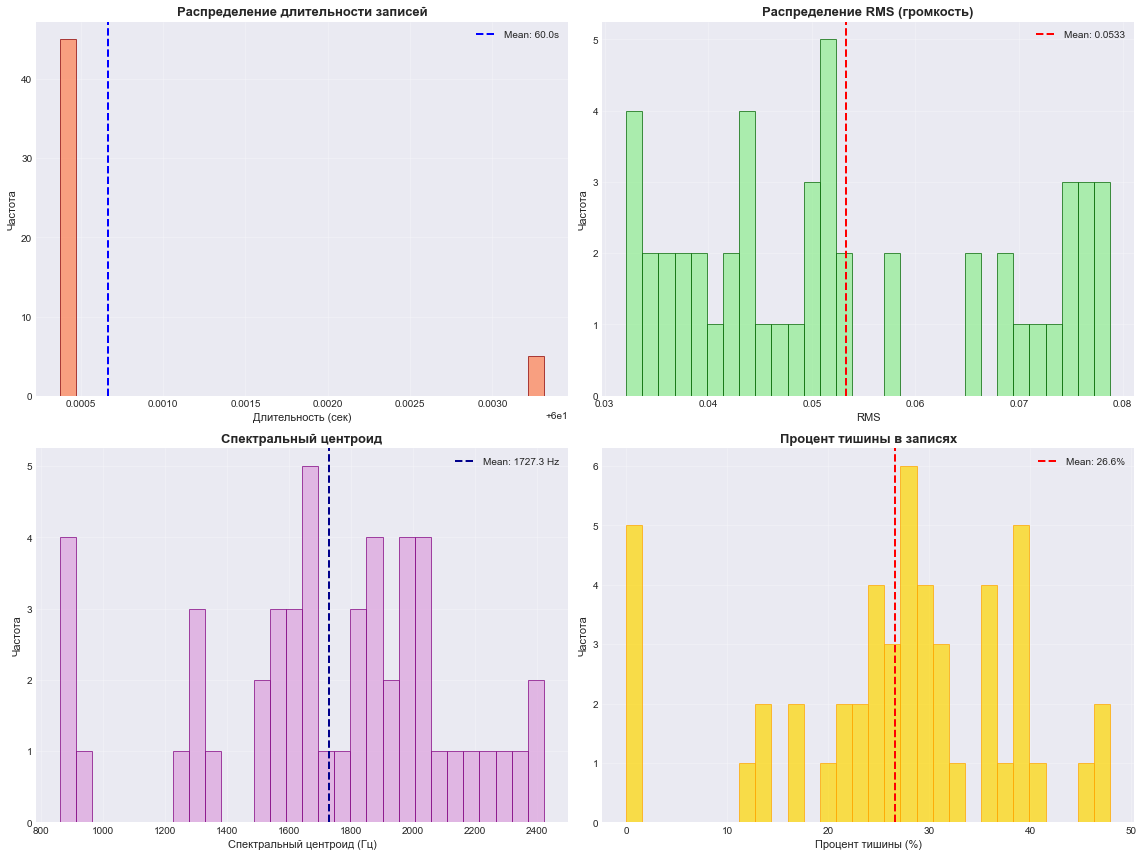

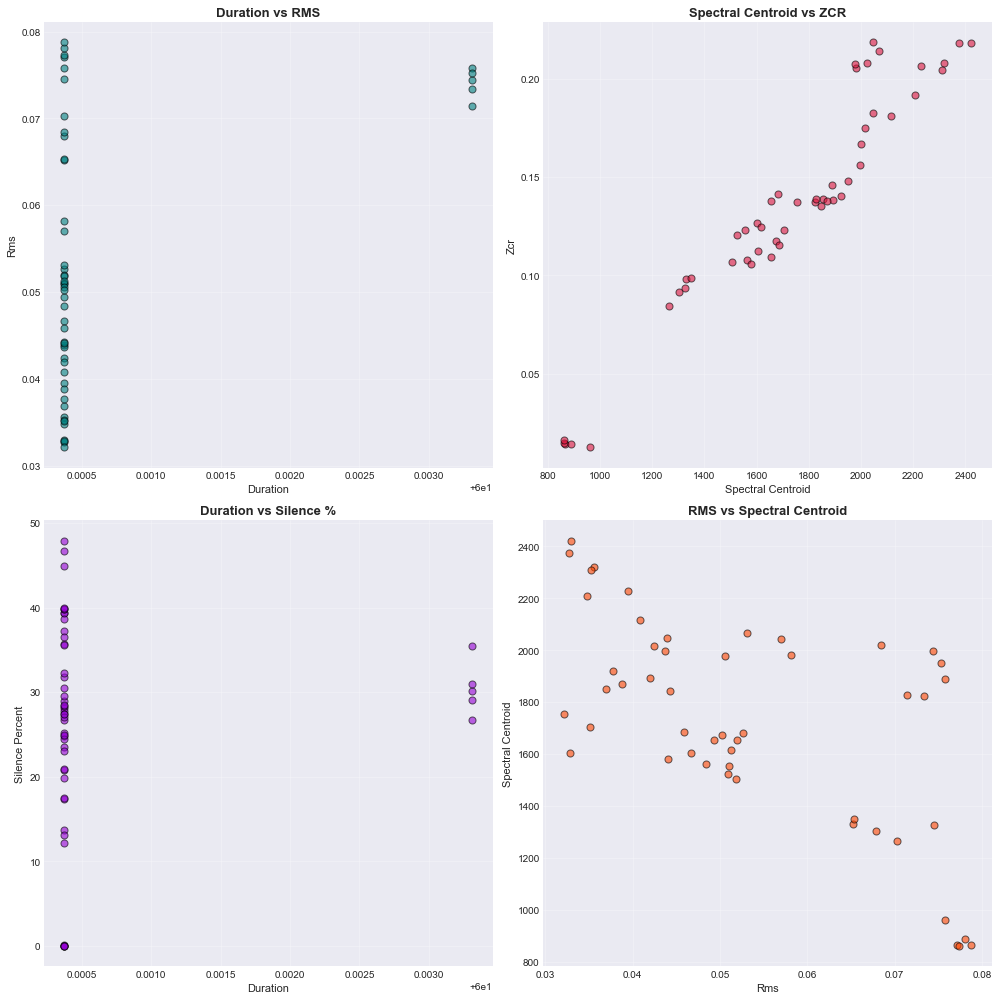


Поиск дефектных файлов...

Найдено дефектных файлов (< 20 сек): 2

Дефектные файлы:
                                           file_path   speaker_id   duration
0  C:\Users\ancol\.cache\kagglehub\datasets\vjcal...  Speaker0026  14.782438
1  C:\Users\ancol\.cache\kagglehub\datasets\vjcal...  Speaker0027   6.193937

РЕЗУЛЬТАТЫ ФИЛЬТРАЦИИ
Было записей: 2511
Было говорящих: 50

После фильтрации:
Осталось записей: 2499
Осталось говорящих: 49
Удалено записей: 12
Удалено говорящих: 1


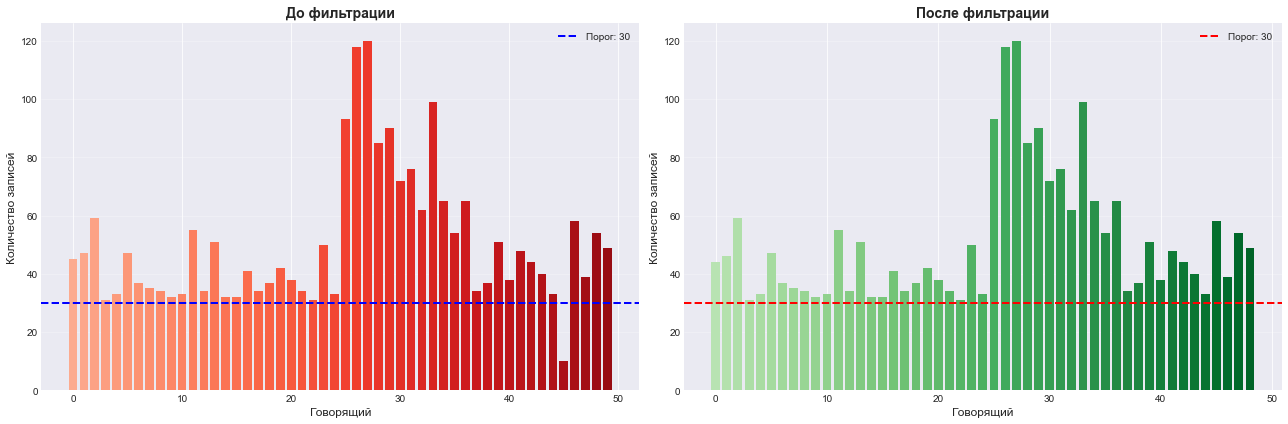


Визуализация примеров аудио...
Визуализация: Speaker0026


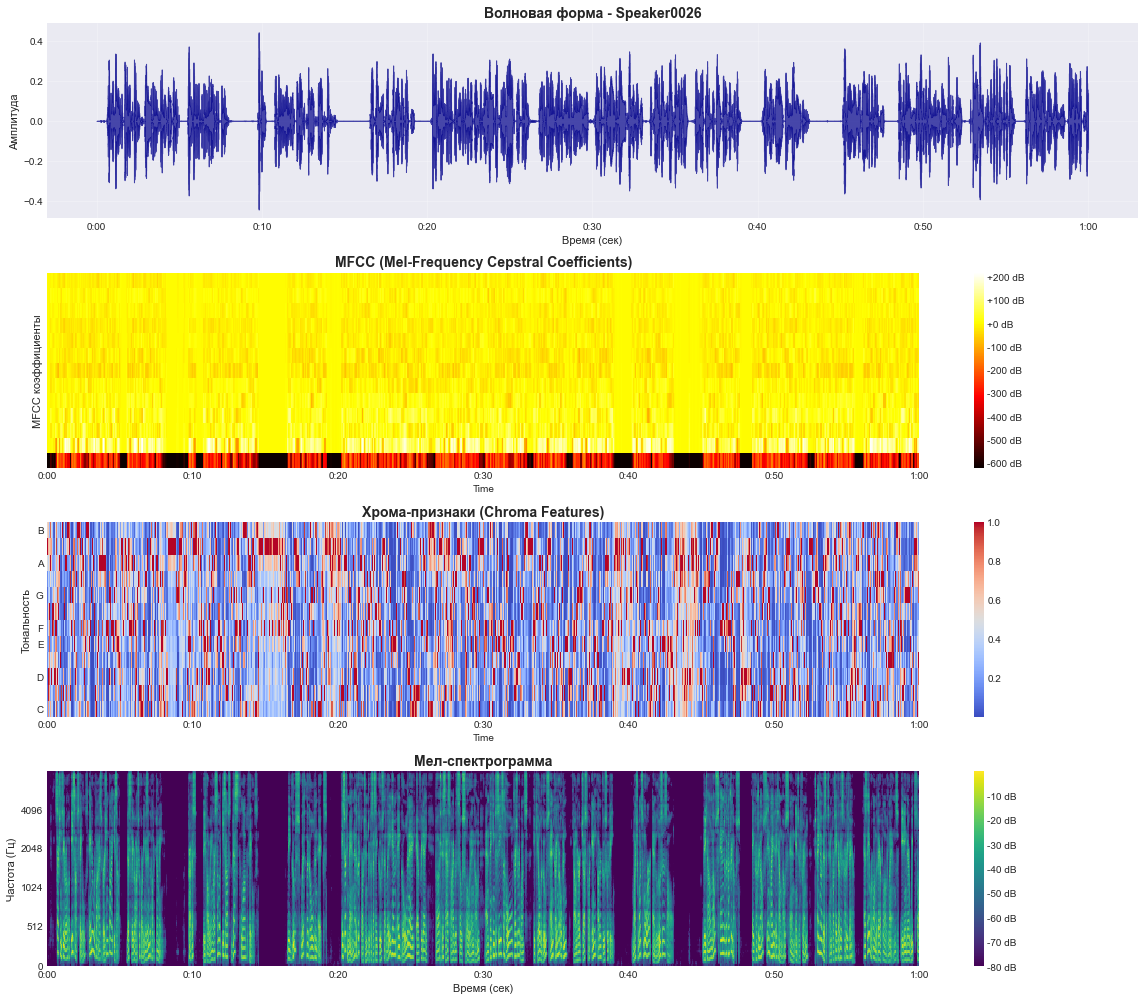

Визуализация: Speaker0027


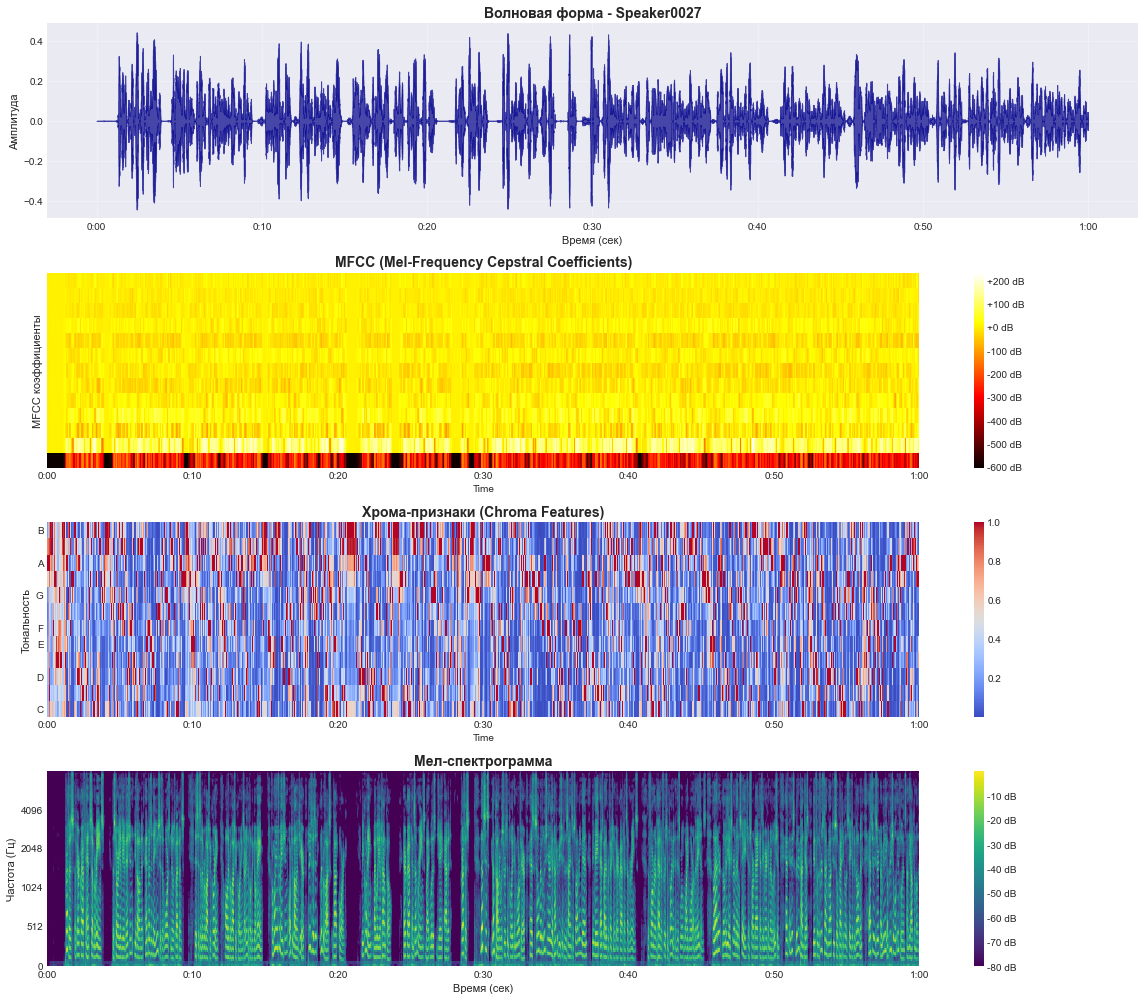

Визуализация: Speaker0028


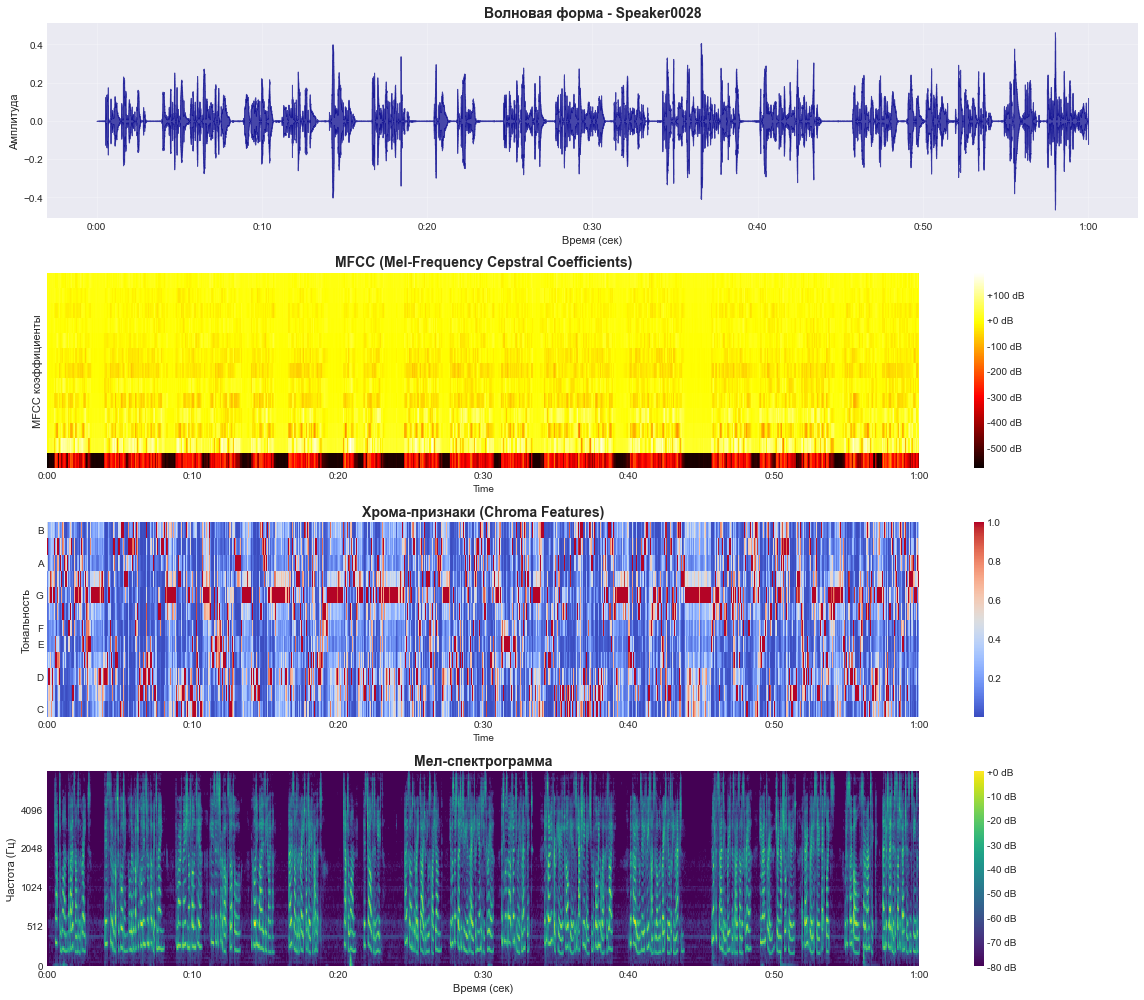


Отфильтрованный датасет сохранен: filtered_dataset.csv
Список говорящих сохранен: filtered_speakers.csv

ЭТАП 1 ЗАВЕРШЕН: Исследование данных
✓ Проанализировано файлов: 2511
✓ Отфильтровано файлов: 2499
✓ Готовых говорящих: 49
✓ Графики сохранены в PNG

Переходите к ноутбуку 02_feature_extraction.ipynb


In [ ]:
# Путь к датасету в Kaggle
input_dir = Path(r"C:\Users\ancol\.cache\kagglehub\datasets\vjcalling\speaker-recognition-audio-dataset\versions\1")
# Если внутри есть подпапка с именем '50_speakers_audio_data', используем её
if (input_dir / '50_speakers_audio_data').exists():
    input_dir = input_dir / '50_speakers_audio_data'

# Ваш способ загрузки данных
audio_files = []
labels = []

for speaker in os.listdir(input_dir):
    speaker_path = os.path.join(input_dir, speaker)
    if os.path.isdir(speaker_path):
        for file in os.listdir(speaker_path):
            if file.endswith('.wav'):
                audio_files.append(os.path.join(speaker_path, file))
                labels.append(speaker)

# Создаем DataFrame
df = pd.DataFrame({
    'file_path': audio_files,
    'speaker_id': labels
})

print(f"Всего файлов: {len(df)}")
print(f"Уникальных говорящих: {df['speaker_id'].nunique()}")
print(f"\nПервые строки:")
print(df.head())

# ============================================================================
# 2. АНАЛИЗ РАСПРЕДЕЛЕНИЯ ДАННЫХ
# ============================================================================

# Подсчет записей на говорящего
speaker_counts = df['speaker_id'].value_counts().sort_index()

print(f"\nСтатистика по записям:")
print(speaker_counts.describe())

# ВАШ ГРАФИК: Распределение записей по говорящим
plt.figure(figsize=(20, 6))
colors = plt.cm.rainbow(np.linspace(0, 1, len(speaker_counts)))
bars = plt.bar(range(len(speaker_counts)), speaker_counts.values, color=colors)
plt.xlabel('Говорящий', fontsize=12)
plt.ylabel('Количество записей', fontsize=12)
plt.title('Распределение записей по говорящим', fontsize=14, fontweight='bold')
plt.xticks(range(len(speaker_counts)), speaker_counts.index, rotation=90, fontsize=8)
plt.axhline(y=30, color='red', linestyle='--', linewidth=2, label='Минимальный порог (30)')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('speaker_distribution_colored.png', dpi=300, bbox_inches='tight')
plt.show()

# ДОПОЛНИТЕЛЬНО: Гистограмма распределения
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Гистограмма количества записей
axes[0].hist(speaker_counts.values, bins=20, color='skyblue', edgecolor='navy', alpha=0.7)
axes[0].axvline(speaker_counts.mean(), color='red', linestyle='--', linewidth=2, label=f'Среднее: {speaker_counts.mean():.1f}')
axes[0].axvline(speaker_counts.median(), color='green', linestyle='--', linewidth=2, label=f'Медиана: {speaker_counts.median():.1f}')
axes[0].set_xlabel('Количество записей', fontsize=12)
axes[0].set_ylabel('Количество говорящих', fontsize=12)
axes[0].set_title('Распределение количества записей', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
bp = axes[1].boxplot(speaker_counts.values, vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightcoral', alpha=0.7),
                      medianprops=dict(color='darkred', linewidth=2),
                      whiskerprops=dict(color='navy', linewidth=1.5),
                      capprops=dict(color='navy', linewidth=1.5))
axes[1].set_ylabel('Количество записей', fontsize=12)
axes[1].set_title('Box Plot распределения', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 3. АНАЛИЗ КАЧЕСТВА АУДИО
# ============================================================================

def analyze_audio_file(file_path):
    """Анализирует один аудиофайл"""
    try:
        y, sr = librosa.load(file_path, sr=16000)
        
        duration = len(y) / sr
        rms = np.sqrt(np.mean(y**2))
        zcr = np.mean(librosa.feature.zero_crossing_rate(y)[0])
        spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0])
        
        # Детектирование тишины
        intervals = librosa.effects.split(y, top_db=20)
        silence_duration = duration - sum([(end - start) / sr for start, end in intervals])
        silence_percent = (silence_duration / duration) * 100 if duration > 0 else 0
        
        return {
            'duration': duration,
            'rms': rms,
            'zcr': zcr,
            'spectral_centroid': spectral_centroid,
            'silence_percent': silence_percent
        }
    except Exception as e:
        return None

# Анализируем выборку файлов (по 5 файлов на говорящего)
print("\nАнализ качества аудио...")
sample_speakers = df['speaker_id'].unique()[:10]  # Первые 10 говорящих
audio_quality = []

for speaker in sample_speakers:
    speaker_files = df[df['speaker_id'] == speaker]['file_path'].head(5)
    for file_path in speaker_files:
        result = analyze_audio_file(file_path)
        if result:
            result['speaker_id'] = speaker
            result['file_path'] = file_path
            audio_quality.append(result)

audio_quality_df = pd.DataFrame(audio_quality)

print("\nСтатистика по качеству аудио:")
print(audio_quality_df[['duration', 'rms', 'zcr', 'spectral_centroid', 'silence_percent']].describe())

# ВИЗУАЛИЗАЦИЯ МЕТРИК КАЧЕСТВА - ЦВЕТНАЯ
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Длительность
axes[0, 0].hist(audio_quality_df['duration'], bins=30, color='coral', edgecolor='darkred', alpha=0.7)
axes[0, 0].axvline(audio_quality_df['duration'].mean(), color='blue', linestyle='--', linewidth=2, label=f"Mean: {audio_quality_df['duration'].mean():.1f}s")
axes[0, 0].set_xlabel('Длительность (сек)', fontsize=11)
axes[0, 0].set_ylabel('Частота', fontsize=11)
axes[0, 0].set_title('Распределение длительности записей', fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. RMS (громкость)
axes[0, 1].hist(audio_quality_df['rms'], bins=30, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
axes[0, 1].axvline(audio_quality_df['rms'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {audio_quality_df['rms'].mean():.4f}")
axes[0, 1].set_xlabel('RMS', fontsize=11)
axes[0, 1].set_ylabel('Частота', fontsize=11)
axes[0, 1].set_title('Распределение RMS (громкость)', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Спектральный центроид
axes[1, 0].hist(audio_quality_df['spectral_centroid'], bins=30, color='plum', edgecolor='purple', alpha=0.7)
axes[1, 0].axvline(audio_quality_df['spectral_centroid'].mean(), color='darkblue', linestyle='--', linewidth=2, label=f"Mean: {audio_quality_df['spectral_centroid'].mean():.1f} Hz")
axes[1, 0].set_xlabel('Спектральный центроид (Гц)', fontsize=11)
axes[1, 0].set_ylabel('Частота', fontsize=11)
axes[1, 0].set_title('Спектральный центроид', fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Процент тишины
axes[1, 1].hist(audio_quality_df['silence_percent'], bins=30, color='gold', edgecolor='orange', alpha=0.7)
axes[1, 1].axvline(audio_quality_df['silence_percent'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {audio_quality_df['silence_percent'].mean():.1f}%")
axes[1, 1].set_xlabel('Процент тишины (%)', fontsize=11)
axes[1, 1].set_ylabel('Частота', fontsize=11)
axes[1, 1].set_title('Процент тишины в записях', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('audio_quality_metrics_colored.png', dpi=300, bbox_inches='tight')
plt.show()

# ДОПОЛНИТЕЛЬНО: Scatter plot матрица
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

scatter_features = [
    ('duration', 'rms', 'Duration vs RMS', 'teal'),
    ('spectral_centroid', 'zcr', 'Spectral Centroid vs ZCR', 'crimson'),
    ('duration', 'silence_percent', 'Duration vs Silence %', 'darkviolet'),
    ('rms', 'spectral_centroid', 'RMS vs Spectral Centroid', 'orangered')
]

for idx, (x_feat, y_feat, title, color) in enumerate(scatter_features):
    row, col = idx // 2, idx % 2
    axes[row, col].scatter(audio_quality_df[x_feat], audio_quality_df[y_feat], 
                          c=color, alpha=0.6, s=50, edgecolors='black')
    axes[row, col].set_xlabel(x_feat.replace('_', ' ').title(), fontsize=11)
    axes[row, col].set_ylabel(y_feat.replace('_', ' ').title(), fontsize=11)
    axes[row, col].set_title(title, fontsize=13, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('audio_quality_scatter_colored.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 4. ПОИСК ДЕФЕКТНЫХ ФАЙЛОВ
# ============================================================================

MIN_DURATION = 20  # секунд

# Проверяем все файлы на минимальную длительность
print("\nПоиск дефектных файлов...")
defective_files = []

for idx, row in df.head(100).iterrows():  # Проверяем первые 100 для примера
    try:
        y, sr = librosa.load(row['file_path'], sr=16000)
        duration = len(y) / sr
        if duration < MIN_DURATION:
            defective_files.append({
                'file_path': row['file_path'],
                'speaker_id': row['speaker_id'],
                'duration': duration
            })
    except:
        pass

defective_df = pd.DataFrame(defective_files)

print(f"\nНайдено дефектных файлов (< {MIN_DURATION} сек): {len(defective_df)}")
if len(defective_df) > 0:
    print("\nДефектные файлы:")
    print(defective_df)

# ============================================================================
# 5. ФИЛЬТРАЦИЯ ДАННЫХ
# ============================================================================

MIN_RECORDINGS = 30

# Подсчитываем количество записей на говорящего
speaker_counts = df['speaker_id'].value_counts()

# Фильтруем говорящих с достаточным количеством записей
valid_speakers = speaker_counts[speaker_counts >= MIN_RECORDINGS].index.tolist()

# Создаем отфильтрованный датасет
df_filtered = df[df['speaker_id'].isin(valid_speakers)].copy()

# Исключаем дефектные файлы если они есть
if len(defective_df) > 0:
    df_filtered = df_filtered[~df_filtered['file_path'].isin(defective_df['file_path'])]

print(f"\n{'='*80}")
print("РЕЗУЛЬТАТЫ ФИЛЬТРАЦИИ")
print('='*80)
print(f"Было записей: {len(df)}")
print(f"Было говорящих: {df['speaker_id'].nunique()}")
print(f"\nПосле фильтрации:")
print(f"Осталось записей: {len(df_filtered)}")
print(f"Осталось говорящих: {df_filtered['speaker_id'].nunique()}")
print(f"Удалено записей: {len(df) - len(df_filtered)}")
print(f"Удалено говорящих: {df['speaker_id'].nunique() - df_filtered['speaker_id'].nunique()}")

# ВИЗУАЛИЗАЦИЯ ДО/ПОСЛЕ - ЦВЕТНАЯ
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# До фильтрации
counts_before = df['speaker_id'].value_counts().sort_index()
colors1 = plt.cm.Reds(np.linspace(0.3, 0.9, len(counts_before)))
axes[0].bar(range(len(counts_before)), counts_before.values, color=colors1)
axes[0].axhline(y=MIN_RECORDINGS, color='blue', linestyle='--', linewidth=2, label=f'Порог: {MIN_RECORDINGS}')
axes[0].set_xlabel('Говорящий', fontsize=12)
axes[0].set_ylabel('Количество записей', fontsize=12)
axes[0].set_title('До фильтрации', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# После фильтрации
counts_after = df_filtered['speaker_id'].value_counts().sort_index()
colors2 = plt.cm.Greens(np.linspace(0.3, 0.9, len(counts_after)))
axes[1].bar(range(len(counts_after)), counts_after.values, color=colors2)
axes[1].axhline(y=MIN_RECORDINGS, color='red', linestyle='--', linewidth=2, label=f'Порог: {MIN_RECORDINGS}')
axes[1].set_xlabel('Говорящий', fontsize=12)
axes[1].set_ylabel('Количество записей', fontsize=12)
axes[1].set_title('После фильтрации', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('filtering_comparison_colored.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 6. ВИЗУАЛИЗАЦИЯ ПРИМЕРОВ АУДИО
# ============================================================================

def visualize_audio_sample(file_path, speaker_id):
    """Визуализация аудио и его признаков - ЦВЕТНАЯ"""
    y, sr = librosa.load(file_path, sr=16000)
    
    fig, axes = plt.subplots(4, 1, figsize=(16, 14))
    
    # 1. Волновая форма
    librosa.display.waveshow(y, sr=sr, ax=axes[0], color='darkblue', alpha=0.7)
    axes[0].set_title(f'Волновая форма - {speaker_id}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Время (сек)', fontsize=11)
    axes[0].set_ylabel('Амплитуда', fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # 2. MFCC
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    img = librosa.display.specshow(mfcc, x_axis='time', sr=sr, ax=axes[1], cmap='hot')
    axes[1].set_title('MFCC (Mel-Frequency Cepstral Coefficients)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('MFCC коэффициенты', fontsize=11)
    fig.colorbar(img, ax=axes[1], format='%+2.0f dB')
    
    # 3. Хрома-признаки
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', sr=sr, ax=axes[2], cmap='coolwarm')
    axes[2].set_title('Хрома-признаки (Chroma Features)', fontsize=14, fontweight='bold')
    axes[2].set_ylabel('Тональность', fontsize=11)
    fig.colorbar(img, ax=axes[2])
    
    # 4. Мел-спектрограмма
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    img = librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr, ax=axes[3], cmap='viridis')
    axes[3].set_title('Мел-спектрограмма', fontsize=14, fontweight='bold')
    axes[3].set_ylabel('Частота (Гц)', fontsize=11)
    axes[3].set_xlabel('Время (сек)', fontsize=11)
    fig.colorbar(img, ax=axes[3], format='%+2.0f dB')
    
    plt.tight_layout()
    plt.savefig(f'audio_visualization_{speaker_id}_colored.png', dpi=300, bbox_inches='tight')
    plt.show()

# Визуализируем несколько примеров
print("\nВизуализация примеров аудио...")
sample_speakers = df_filtered['speaker_id'].unique()[:3]

for speaker in sample_speakers:
    sample_file = df_filtered[df_filtered['speaker_id'] == speaker]['file_path'].iloc[0]
    print(f"Визуализация: {speaker}")
    visualize_audio_sample(sample_file, speaker)

# ============================================================================
# 7. СОХРАНЕНИЕ ОТФИЛЬТРОВАННЫХ ДАННЫХ
# ============================================================================

# Сохраняем отфильтрованный DataFrame
df_filtered.to_csv('filtered_dataset.csv', index=False)
print(f"\nОтфильтрованный датасет сохранен: filtered_dataset.csv")

# Сохраняем список отфильтрованных говорящих
pd.DataFrame({'speaker_id': valid_speakers}).to_csv('filtered_speakers.csv', index=False)
print(f"Список говорящих сохранен: filtered_speakers.csv")

print("\n" + "="*80)
print("ЭТАП 1 ЗАВЕРШЕН: Исследование данных")
print("="*80)
print(f"✓ Проанализировано файлов: {len(df)}")
print(f"✓ Отфильтровано файлов: {len(df_filtered)}")
print(f"✓ Готовых говорящих: {len(valid_speakers)}")
print(f"✓ Графики сохранены в PNG")
print("\nПереходите к ноутбуку 02_feature_extraction.ipynb")
print("="*80)